In [10]:
# Install any library that isn’t built-in
!pip install plotly gdown --quiet
!pip install us


# Import all required libraries
import pandas as pd                # To handle structured data
import matplotlib.pyplot as plt    # Basic graph plotting
import seaborn as sns              # Pretty charts & statistical plots
import plotly.express as px        # Interactive plots
import statsmodels.api as sm       # Regression and stats
import requests                    # API access
import json                        # Handling API responses




In [11]:
hud_url = "https://raw.githubusercontent.com/elmoallistair/datacamp/master/data-manipulation-with-pandas/datasets/homelessness.csv"
df_hud = pd.read_csv(hud_url)
df_hud.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
0,0,East South Central,Alabama,2570.0,864.0,4887681
1,1,Pacific,Alaska,1434.0,582.0,735139
2,2,Mountain,Arizona,7259.0,2606.0,7158024
3,3,West South Central,Arkansas,2280.0,432.0,3009733
4,4,Pacific,California,109008.0,20964.0,39461588


In [12]:
import requests
import json

# Set your API key (get one at https://data.bls.gov/registrationEngine/)
BLS_API_KEY = "d764e447c6994b7faa469550887f2531"

# Define series IDs for all 50 states plus DC (unemployment rate data) 2022-2023
# Format: LAUST + state FIPS code + 0000000000003
series_ids = [
    "LAUST010000000000003",  # Alabama
    "LAUST020000000000003",  # Alaska
    "LAUST040000000000003",  # Arizona
    "LAUST050000000000003",  # Arkansas
    "LAUST060000000000003",  # California
    "LAUST080000000000003",  # Colorado
    "LAUST090000000000003",  # Connecticut
    "LAUST100000000000003",  # Delaware
    "LAUST110000000000003",  # District of Columbia
    "LAUST120000000000003",  # Florida
    "LAUST130000000000003",  # Georgia
    "LAUST150000000000003",  # Hawaii
    "LAUST160000000000003",  # Idaho
    "LAUST170000000000003",  # Illinois
    "LAUST180000000000003",  # Indiana
    "LAUST190000000000003",  # Iowa
    "LAUST200000000000003",  # Kansas
    "LAUST210000000000003",  # Kentucky
    "LAUST220000000000003",  # Louisiana
    "LAUST230000000000003",  # Maine
    "LAUST240000000000003",  # Maryland
    "LAUST250000000000003",  # Massachusetts
    "LAUST260000000000003",  # Michigan
    "LAUST270000000000003",  # Minnesota
    "LAUST280000000000003",  # Mississippi
    "LAUST290000000000003",  # Missouri
    "LAUST300000000000003",  # Montana
    "LAUST310000000000003",  # Nebraska
    "LAUST320000000000003",  # Nevada
    "LAUST330000000000003",  # New Hampshire
    "LAUST340000000000003",  # New Jersey
    "LAUST350000000000003",  # New Mexico
    "LAUST360000000000003",  # New York
    "LAUST370000000000003",  # North Carolina
    "LAUST380000000000003",  # North Dakota
    "LAUST390000000000003",  # Ohio
    "LAUST400000000000003",  # Oklahoma
    "LAUST410000000000003",  # Oregon
    "LAUST420000000000003",  # Pennsylvania
    "LAUST440000000000003",  # Rhode Island
    "LAUST450000000000003",  # South Carolina
    "LAUST460000000000003",  # South Dakota
    "LAUST470000000000003",  # Tennessee
    "LAUST480000000000003",  # Texas
    "LAUST490000000000003",  # Utah
    "LAUST500000000000003",  # Vermont
    "LAUST510000000000003",  # Virginia
    "LAUST530000000000003",  # Washington
    "LAUST540000000000003",  # West Virginia
    "LAUST550000000000003",  # Wisconsin
    "LAUST560000000000003"   # Wyoming
]

headers = {'Content-type': 'application/json'}
data = {
    "seriesid": series_ids,
    "registrationkey": BLS_API_KEY,
    "startyear": "2022",
    "endyear": "2023"
}

# Send the API request
response = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', json=data, headers=headers)

# Convert response to readable JSON
json_data = response.json()
print(json.dumps(json_data, indent=2))

{
  "status": "REQUEST_SUCCEEDED",
  "responseTime": 375,
  "message": [
    "Requested Series list has been reduced to the system-allowed limit of 50 series."
  ],
  "Results": {
    "series": [
      {
        "seriesID": "LAUST010000000000003",
        "data": [
          {
            "year": "2023",
            "period": "M12",
            "periodName": "December",
            "value": "2.6",
            "footnotes": [
              {
                "code": "R",
                "text": "Data were subject to revision on March 5, 2025."
              }
            ]
          },
          {
            "year": "2023",
            "period": "M11",
            "periodName": "November",
            "value": "2.5",
            "footnotes": [
              {
                "code": "R",
                "text": "Data were subject to revision on March 5, 2025."
              }
            ]
          },
          {
            "year": "2023",
            "period": "M10",
            "peri

In [13]:
# Using a hosted dataset of mental health stats 2022-2023
mental_url = "https://docs.google.com/spreadsheets/d/16iDCLdslT0-e_dcslxQLjm6ujRPfmLKIxizvzEncfls/export?format=csv&gid=0"

df_mental = pd.read_csv(mental_url)
df_mental.head()




,State,18+ Estimate,18+ 95% CI (Lower),18+ 95% CI (Upper),18-25 Estimate,18-25 95% CI (Lower),18-25 95% CI (Upper),26+ Estimate,26+ 95% CI (Lower),26+ 95% CI (Upper)
0,Total U.S.,5.83%,5.60%,6.07%,10.97%,10.41%,11.56%,5.04%,4.79%,5.30%
1,Northeast,5.45%,5.06%,5.87%,10.76%,9.87%,11.71%,4.66%,4.25%,5.11%
2,Midwest,6.05%,5.67%,6.45%,11.20%,10.42%,12.03%,5.23%,4.83%,5.67%
3,South,5.71%,5.41%,6.04%,10.42%,9.71%,11.17%,4.98%,4.66%,5.33%
4,West,6.11%,5.68%,6.57%,11.82%,10.81%,12.90%,5.23%,4.78%,5.71%


In [14]:
# Using a hosted dataset of median housing costs by state
housing_url = "https://docs.google.com/spreadsheets/d/1AQ1iKpxQiyuwgqYRkx9Y3Dgyynl5HOFycaF0WtL9Ysk/export?format=csv&gid=0"

# Load the data into a pandas DataFrame
df_housing = pd.read_csv(housing_url)
df_housing.head()

,SizeRank,State,AVG Cost 2022,AVG Cost 2023
0,23,Alabama,"$222,123.89","$227,947.11"
1,48,Alaska,"$360,339.85","$363,787.78"
2,13,Arizona,"$449,034.97","$430,336.16"
3,33,Arkansas,"$205,689.18","$210,757.74"
4,0,California,"$761,156.46","$751,312.80"


In [15]:
# Standardize state names
df_hud['state'] = df_hud['state'].str.title().str.strip()
df_mental['State'] = df_mental['State'].str.title().str.strip()
df_housing['State'] = df_housing['State'].str.title().str.strip()

# Merge df_hud and df_mental
merged = df_hud.merge(df_mental, left_on='state', right_on='State', how='inner')

# Merge with df_housing just once
merged = merged.merge(df_housing, on='State', how='inner')

# Drop duplicate 'State' column (if needed)
merged.drop(columns='State', inplace=True)

# Optional: preview result
print(merged.columns)
merged.head()

Index(['Unnamed: 0', 'region', 'state', 'individuals', 'family_members',
       'state_pop', '18+ Estimate', '18+ 95% CI (Lower)', '18+ 95% CI (Upper)',
       '18-25 Estimate', '18-25 95% CI (Lower)', '18-25 95% CI (Upper)',
       '26+ Estimate', '26+ 95% CI (Lower)', '26+ 95% CI (Upper)', 'SizeRank',
       'AVG Cost 2022', 'AVG Cost 2023'],
      dtype='object')


,Unnamed: 0,region,state,individuals,family_members,state_pop,18+ Estimate,18+ 95% CI (Lower),18+ 95% CI (Upper),18-25 Estimate,18-25 95% CI (Lower),18-25 95% CI (Upper),26+ Estimate,26+ 95% CI (Lower),26+ 95% CI (Upper),SizeRank,AVG Cost 2022,AVG Cost 2023
0,0,East South Central,Alabama,2570.0,864.0,4887681,5.77%,4.71%,7.04%,9.61%,7.73%,11.88%,5.15%,4.04%,6.54%,23,"$222,123.89","$227,947.11"
1,1,Pacific,Alaska,1434.0,582.0,735139,7.29%,5.94%,8.93%,13.23%,10.72%,16.23%,6.45%,5.04%,8.23%,48,"$360,339.85","$363,787.78"
2,2,Mountain,Arizona,7259.0,2606.0,7158024,7.21%,5.85%,8.85%,13.66%,10.93%,16.94%,6.17%,4.77%,7.95%,13,"$449,034.97","$430,336.16"
3,3,West South Central,Arkansas,2280.0,432.0,3009733,6.96%,5.67%,8.52%,10.85%,8.69%,13.47%,6.34%,4.97%,8.05%,33,"$205,689.18","$210,757.74"
4,4,Pacific,California,109008.0,20964.0,39461588,4.87%,4.25%,5.58%,10.10%,8.61%,11.81%,4.06%,3.43%,4.81%,0,"$761,156.46","$751,312.80"


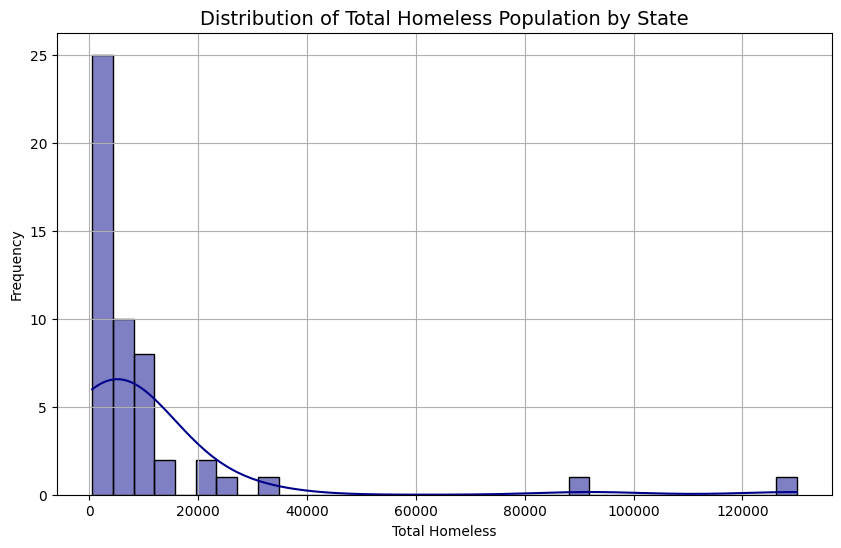

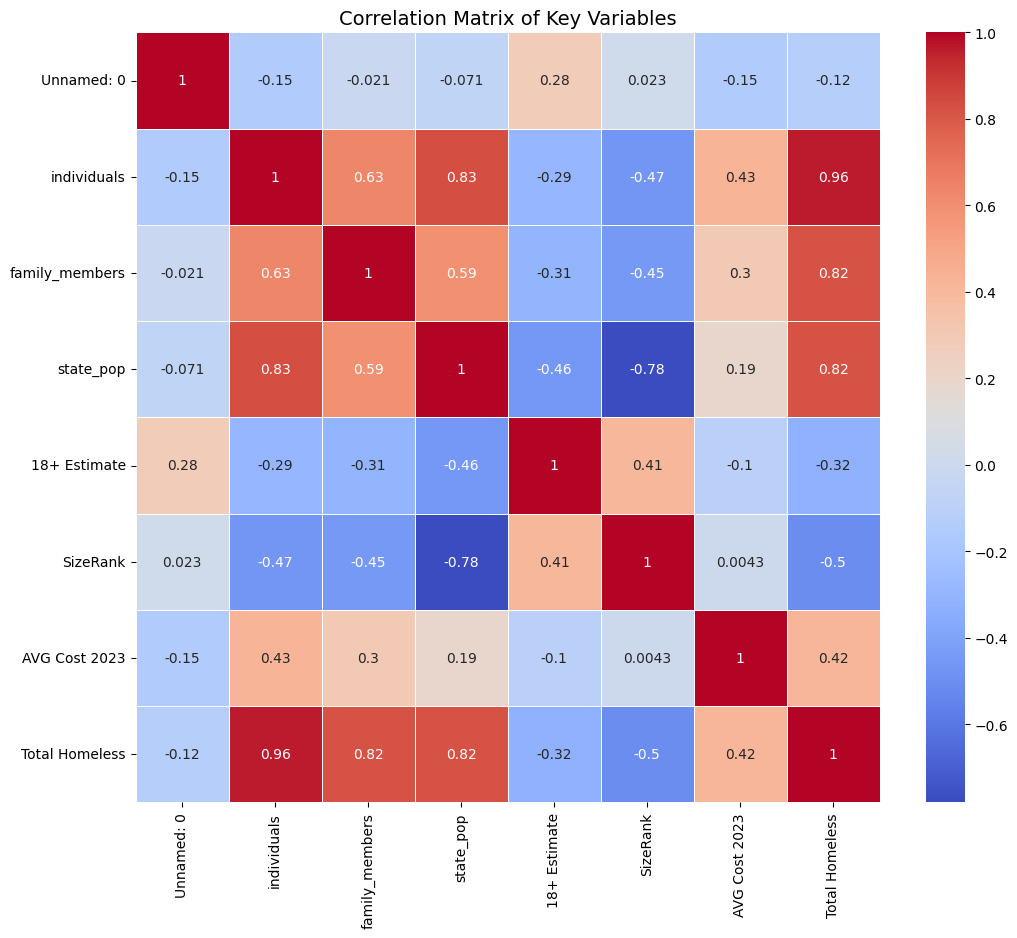

['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'District Of Columbia' 'FL' 'GA'
 'HI' 'ID' 'IL' 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS'
 'MO' 'MT' 'NE' 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA'
 'RI' 'SC' 'SD' 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']
Number of states in the merged dataframe: 51


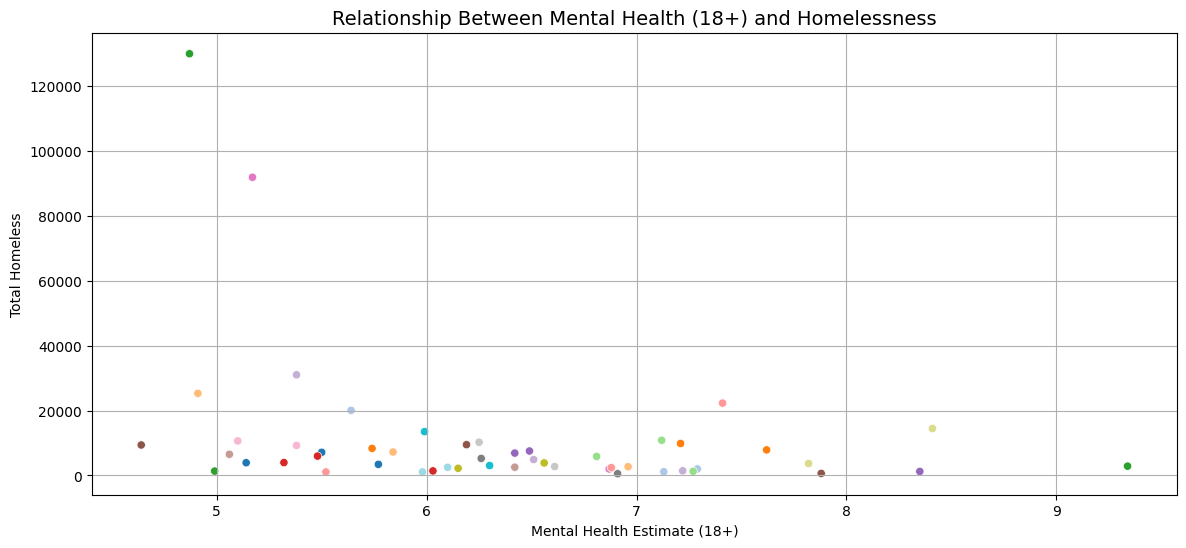

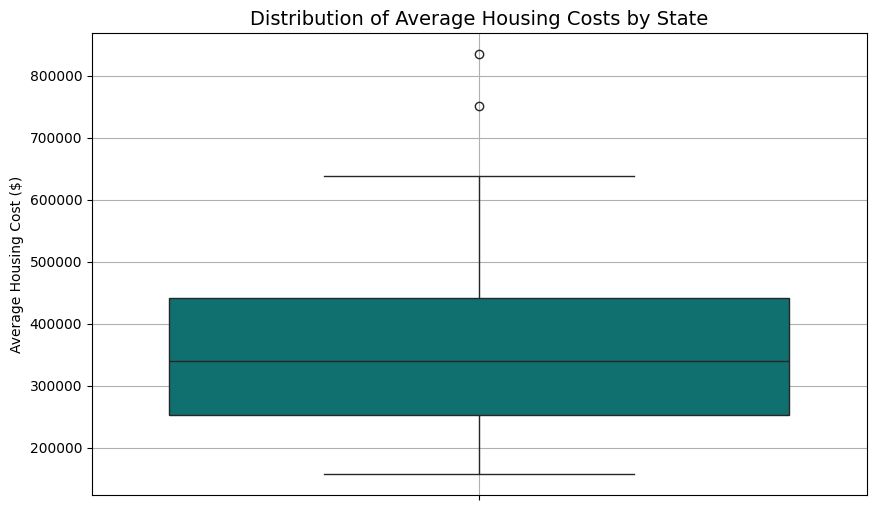

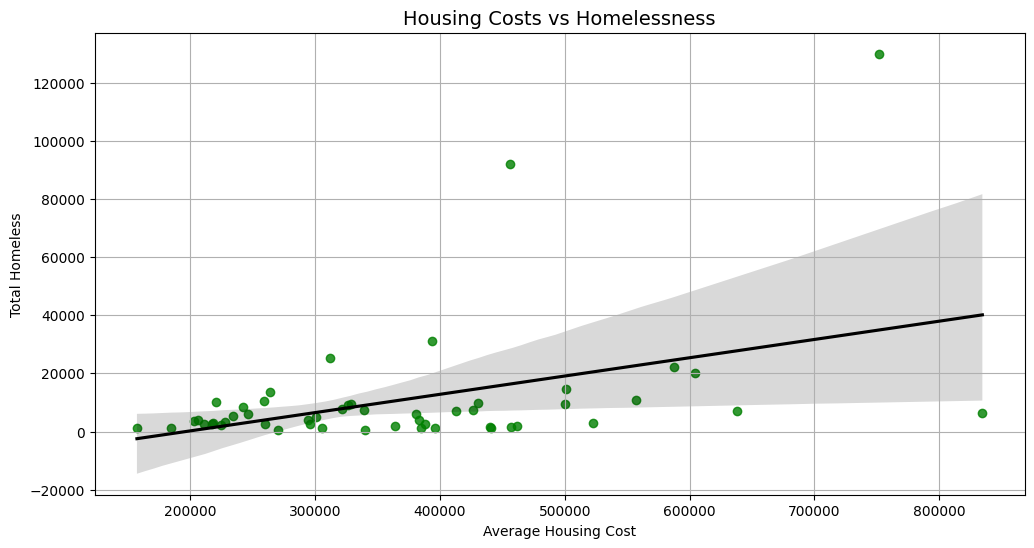

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import us

# Calculate Total Homeless if not already present (ensure it's numeric)
if 'Total Homeless' not in merged.columns:
    merged['Total Homeless'] = merged['individuals'] + merged['family_members']
merged['Total Homeless'] = pd.to_numeric(merged['Total Homeless'])

# Convert '18+ Estimate' to numeric if not already present
if '18+ Estimate' in merged.columns and merged['18+ Estimate'].dtype == 'object':
    merged['18+ Estimate'] = merged['18+ Estimate'].str.replace('%', '', regex=True).astype(float)

# Convert 'AVG Cost 2023' to numeric if not already present
if 'AVG Cost 2023' in merged.columns and merged['AVG Cost 2023'].dtype == 'object':
    merged['AVG Cost 2023'] = merged['AVG Cost 2023'].replace({'\$': '', ',': ''}, regex=True).astype(float)


# --- Visualizations ---

# Histogram of Homelessness
plt.figure(figsize=(10,6))
sns.histplot(merged["Total Homeless"], kde=True, color="darkblue")
plt.title("Distribution of Total Homeless Population by State", fontsize=14)
plt.xlabel("Total Homeless")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
numeric_cols = merged.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Key Variables", fontsize=14)
plt.show()


# Convert full state names to abbreviations
merged['state'] = merged['state'].apply(lambda x: us.states.lookup(x).abbr if us.states.lookup(x) else x)
print(merged['state'].unique())

# Choropleth map of Homelessness
print(f"Number of states in the merged dataframe: {len(merged['state'].unique())}")
fig = px.choropleth(
    merged,
    locations="state",
    locationmode="USA-states",
    color="Total Homeless",
    scope="usa",
    color_continuous_scale="Reds",
    title="Total Homelessness by State"
)
fig.show()

# Choropleth map of Mental Health (18+ Estimate)
if '18+ Estimate' in merged.columns:
    fig = px.choropleth(
        merged,
        locations="state",
        locationmode="USA-states",
        color="18+ Estimate",
        scope="usa",
        color_continuous_scale="Purples",
        title="Mental Health Estimate (18+) by State"
    )
    fig.show()
else:
    print("Skipping Mental Health Choropleth: '18+ Estimate' column not found.")


# Bar chart: Mental Health vs Homelessness
if '18+ Estimate' in merged.columns:
    plt.figure(figsize=(14, 6))
    sns.scatterplot(x="18+ Estimate", y="Total Homeless", data=merged, hue="state", palette="tab20", legend=False)
    plt.title("Relationship Between Mental Health (18+) and Homelessness", fontsize=14)
    plt.xlabel("Mental Health Estimate (18+)")
    plt.ylabel("Total Homeless")
    plt.grid(True)
    plt.show()
else:
    print("Skipping Mental Health Scatter Plot: '18+ Estimate' column not found.")


# Housing Cost Distribution
if 'AVG Cost 2023' in merged.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(y=merged["AVG Cost 2023"], color="teal")
    plt.title("Distribution of Average Housing Costs by State", fontsize=14)
    plt.ylabel("Average Housing Cost ($)")
    plt.grid(True)
    plt.show()
else:
     print("Skipping Housing Cost Boxplot: 'AVG Cost 2023' column not found.")

# Scatter Plot: Housing Costs vs Homelessness
if 'AVG Cost 2023' in merged.columns:
    plt.figure(figsize=(12,6))
    sns.regplot(x="AVG Cost 2023", y="Total Homeless", data=merged, scatter_kws={"color": "green"}, line_kws={"color": "black"})
    plt.title("Housing Costs vs Homelessness", fontsize=14)
    plt.xlabel("Average Housing Cost")
    plt.ylabel("Total Homeless")
    plt.grid(True)
    plt.show()
else:
    print("Skipping Housing Cost Scatter Plot: 'AVG Cost 2023' column not found.")

In [17]:
import statsmodels.api as sm
import pandas as pd

# Ensure 'Total Homeless', '18+ Estimate', and 'AVG Cost 2023' are numeric
# This is already done in cell pfcL6kjC6R6o, but we include it here for robustness
if 'Total Homeless' not in merged.columns:
    merged['Total Homeless'] = merged['individuals'] + merged['family_members']
merged['Total Homeless'] = pd.to_numeric(merged['Total Homeless'])

if '18+ Estimate' in merged.columns and merged['18+ Estimate'].dtype == 'object':
    merged['18+ Estimate'] = merged['18+ Estimate'].str.replace('%', '', regex=True).astype(float)

if 'AVG Cost 2023' in merged.columns and merged['AVG Cost 2023'].dtype == 'object':
    merged['AVG Cost 2023'] = merged['AVG Cost 2023'].replace({'\$': '', ',': ''}, regex=True).astype(float)


# Select predictors and target using available columns
# Using '18+ Estimate' and 'AVG Cost 2023' as predictors
X = merged[['18+ Estimate', 'AVG Cost 2023']]
y = merged['Total Homeless']

# Add a constant for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Total Homeless   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     8.320
Date:                Fri, 08 Aug 2025   Prob (F-statistic):           0.000791
Time:                        17:51:06   Log-Likelihood:                -573.69
No. Observations:                  51   AIC:                             1153.
Df Residuals:                      48   BIC:                             1159.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           2.74e+04    1.9e+04      1.439

In [18]:
import plotly.express as px
import pandas as pd
import us


# Ensure 'Total Homeless' is calculated and is numeric
if 'Total Homeless' not in merged.columns:
    merged['Total Homeless'] = merged['individuals'] + merged['family_members']
merged['Total Homeless'] = pd.to_numeric(merged['Total Homeless'], errors='coerce')

# Drop rows where 'Total Homeless' is NaN after coercion and include 'State'
merged_cleaned = merged.dropna(subset=['Total Homeless'])[['state', 'Total Homeless']].copy()


print(f"Number of states in the dataframe for choropleth: {len(merged_cleaned['state'].unique())}")
print(f"Data types of columns used for choropleth: Total Homeless - {merged_cleaned['Total Homeless'].dtype}, state - {merged_cleaned['state'].dtype}")
print(f"Sample data for choropleth:\n{merged_cleaned[['state', 'Total Homeless']].head()}")

#Convert states to abbreviations
def name_to_abbr(name):
    state = us.states.lookup(name)
    return state.abbr if state else None

merged['state'] = merged['state'].apply(name_to_abbr)
merged_cleaned = merged.dropna(subset=['Total Homeless', 'state'])[['state', 'Total Homeless']].copy()


# Choropleth map of Homelessness
fig = px.choropleth(
    merged_cleaned,
    locations="state",
    locationmode="USA-states",
    color="Total Homeless",
    scope="usa",
    color_continuous_scale="Reds",
    title="Total Homelessness by State (US)"
)
fig.show()

Number of states in the dataframe for choropleth: 51
Data types of columns used for choropleth: Total Homeless - float64, state - object
Sample data for choropleth:
  state  Total Homeless
0    AL          3434.0
1    AK          2016.0
2    AZ          9865.0
3    AR          2712.0
4    CA        129972.0


# Task
Explain the error in the selected code, fix it if possible, and incorporate the changes into the existing code. Otherwise, diagnose the error.

## Explore relationships

### Subtask:
Visualize the relationships between homelessness and other variables (mental health, housing costs) using scatter plots or other appropriate visualizations.


**Reasoning**:
The error in the previous cell was due to trying to access a column named 'Total Homeless' that does not exist in the `merged` DataFrame. The first step is to calculate the total homeless by summing 'individuals' and 'family_members' and create the 'Total Homeless' column. Then, I will proceed with generating the requested visualizations as outlined in the subtask instructions.



**Reasoning**:
Select and prepare the relevant columns for regression analysis, convert percentage strings to numerical values, define dependent and independent variables, add a constant term, fit the OLS model, and print the summary.

